In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Óxido de Metal

## Con fondo blanco

In [31]:
img_MB1 = cv2.imread("res_oxi_M/1.jpg", cv2.IMREAD_COLOR)
img_MB3 = cv2.imread("res_oxi_M/3.jpg", cv2.IMREAD_COLOR)
img_MB4 = cv2.imread("res_oxi_M/4.jpg", cv2.IMREAD_COLOR)
img_MB5 = cv2.imread("res_oxi_M/5.jpg", cv2.IMREAD_COLOR)
img_MB10 = cv2.imread("res_oxi_M/10.jpg", cv2.IMREAD_COLOR)
img_MB11 = cv2.imread("res_oxi_M/11.jpg", cv2.IMREAD_COLOR)
img_MB13 = cv2.imread("res_oxi_M/13.jpg", cv2.IMREAD_COLOR)
img_MB15 = cv2.imread("res_oxi_M/15.jpg", cv2.IMREAD_COLOR)

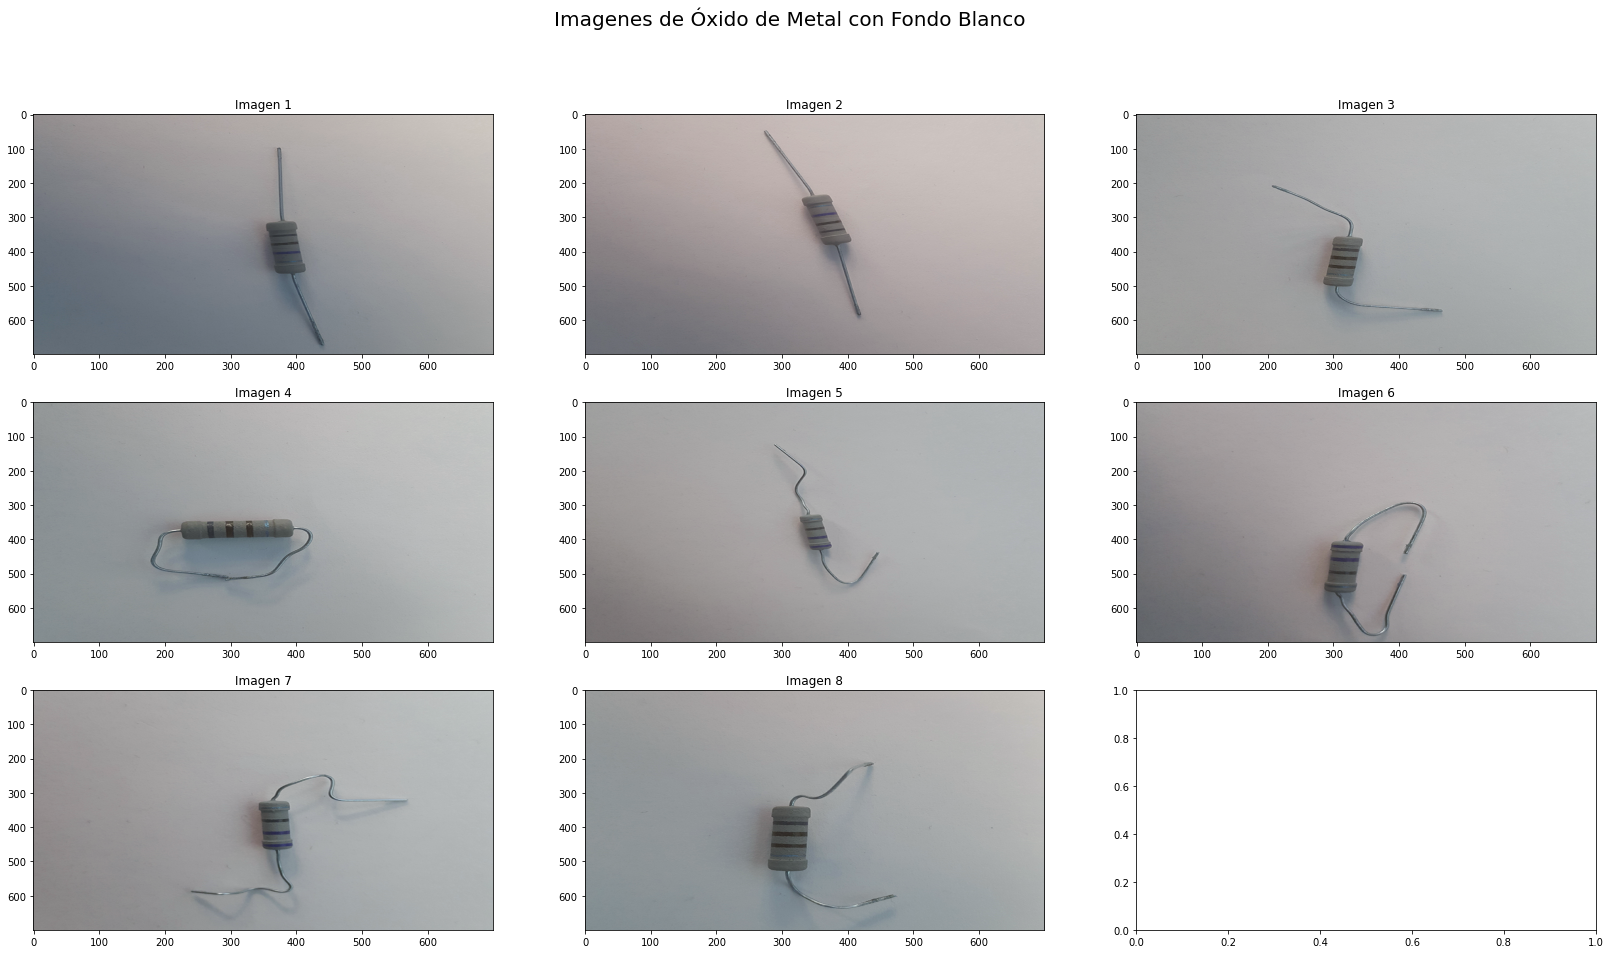

In [19]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(28, 15))
fig.suptitle('Imagenes de Óxido de Metal con Fondo Blanco', fontsize=20)

ax1.set_title('Imagen 1')
ax1.imshow(img_MB1, cmap='Reds', aspect='auto')

ax2.set_title('Imagen 2')
ax2.imshow(img_MB3, cmap='Reds', aspect='auto')

ax3.set_title('Imagen 3')
ax3.imshow(img_MB4, cmap='Reds', aspect='auto')

ax4.set_title('Imagen 4')
ax4.imshow(img_MB5, cmap='Reds', aspect='auto')

ax5.set_title('Imagen 5')
ax5.imshow(img_MB10, cmap='Reds', aspect='auto')

ax6.set_title('Imagen 6')
ax6.imshow(img_MB11, cmap='Reds', aspect='auto')

ax7.set_title('Imagen 7')
ax7.imshow(img_MB13, cmap='Reds', aspect='auto')

ax8.set_title('Imagen 8')
ax8.imshow(img_MB15, cmap='Reds', aspect='auto')


plt.show()

### Tomado una como prueba

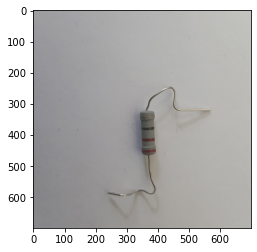

In [39]:
img = img_MB13
img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

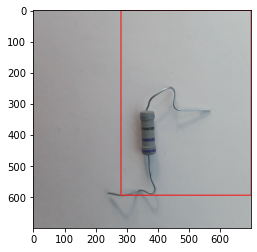

In [40]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 200  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

# Encuentra los contornos
contornos, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Inicializa las listas que contendrán los límites de los contornos
x_min = []
y_min = []
x_max = []
y_max = []


# Itera sobre los contornos y encuentra los límites
for cnt in contornos:
    x, y, w, h = cv2.boundingRect(cnt)
    x_min.append(x)
    y_min.append(y)
    x_max.append(x+w)
    y_max.append(y+h)
    
# Determina los límites generales
x1 = min(x_min)
y1 = min(y_min)
x2 = max(x_max)
y2 = max(y_max)

# Calcula el centro del bounding box
centro_x = x1 + (x2 - x1) // 2
centro_y = y1 + (y2 - y1) // 2

# Copia de la imagen original
copia = img.copy()

# Dibuja el bounding box en la imagen
cv2.rectangle(copia, (x1, y1), (x2, y2), (255,0,0), 2)

plt.imshow(copia)


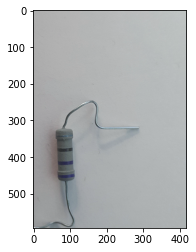

In [41]:
copia = img.copy()  #Otra copia

# Recorta la imagen
recorte = copia[y1:y2, x1:x2]
plt.imshow(recorte)

### Sacando umbralización a la imagen recortada con la resistencia (Mascara)

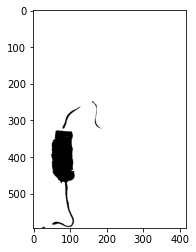

In [42]:
gray = cv2.cvtColor(recorte, cv2.COLOR_BGR2GRAY)

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 100  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded,cmap="gray")

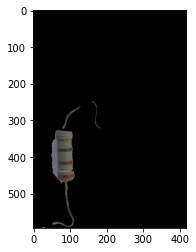

In [43]:
mascara=cv2.bitwise_not(thresholded)

result = cv2.bitwise_and(recorte, recorte, mask=mascara)
#Muestra el resultado
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.show()

### Función para hacer todos los pasos anteriores:
Recibe como parametro la imagen, hace todo lo anterior y retorna el resultado

In [15]:
def fun_oxiMB_mask(img):
    img_rgb = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

    # Aplicar un suavizado para eliminar el ruido
    smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

    # Normalizar la imagen en el rango [0, 255]
    normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Aplicar la umbralización a la imagen normalizada
    threshold_value = 200  # Valor de umbral ajustable
    _, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

    # Encuentra los contornos
    contornos, _ = cv2.findContours(thresholded, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Inicializa las listas que contendrán los límites de los contornos
    x_min = []
    y_min = []
    x_max = []
    y_max = []


    # Itera sobre los contornos y encuentra los límites
    for cnt in contornos:
        x, y, w, h = cv2.boundingRect(cnt)
        x_min.append(x)
        y_min.append(y)
        x_max.append(x+w)
        y_max.append(y+h)

    # Determina los límites generales
    x1 = min(x_min)
    y1 = min(y_min)
    x2 = max(x_max)
    y2 = max(y_max)

    # Calcula el centro del bounding box
    centro_x = x1 + (x2 - x1) // 2
    centro_y = y1 + (y2 - y1) // 2

    # Copia de la imagen original
    copia = img.copy()

    # Dibuja el bounding box en la imagen
    cv2.rectangle(copia, (x1, y1), (x2, y2), (255,0,0), 2)
    
    copia = img.copy()  #Otra copia

    # Recorta la imagen
    recorte = copia[y1:y2, x1:x2]
    
    gray = cv2.cvtColor(recorte, cv2.COLOR_BGR2GRAY)

    # Aplicar un suavizado para eliminar el ruido
    smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

    # Normalizar la imagen en el rango [0, 255]
    normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Aplicar la umbralización a la imagen normalizada
    threshold_value = 100  # Valor de umbral ajustable
    _, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)
    
    mascara=cv2.bitwise_not(thresholded)
    result = cv2.bitwise_and(recorte, recorte, mask=mascara)
    #Muestra el resultado
    #plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
    #plt.show()
    return cv2.cvtColor(result, cv2.COLOR_BGR2RGB)

Aplicando la funcion a todas las imagenes de fondo blanco

In [16]:
resultados_MB = []
lista_MB = [img_MB1,img_MB10,img_MB11,img_MB13,img_MB15,img_MB3,img_MB4,img_MB5]

for e in lista_MB:
    resultados_MB.append(fun_oxiMB_mask(e))

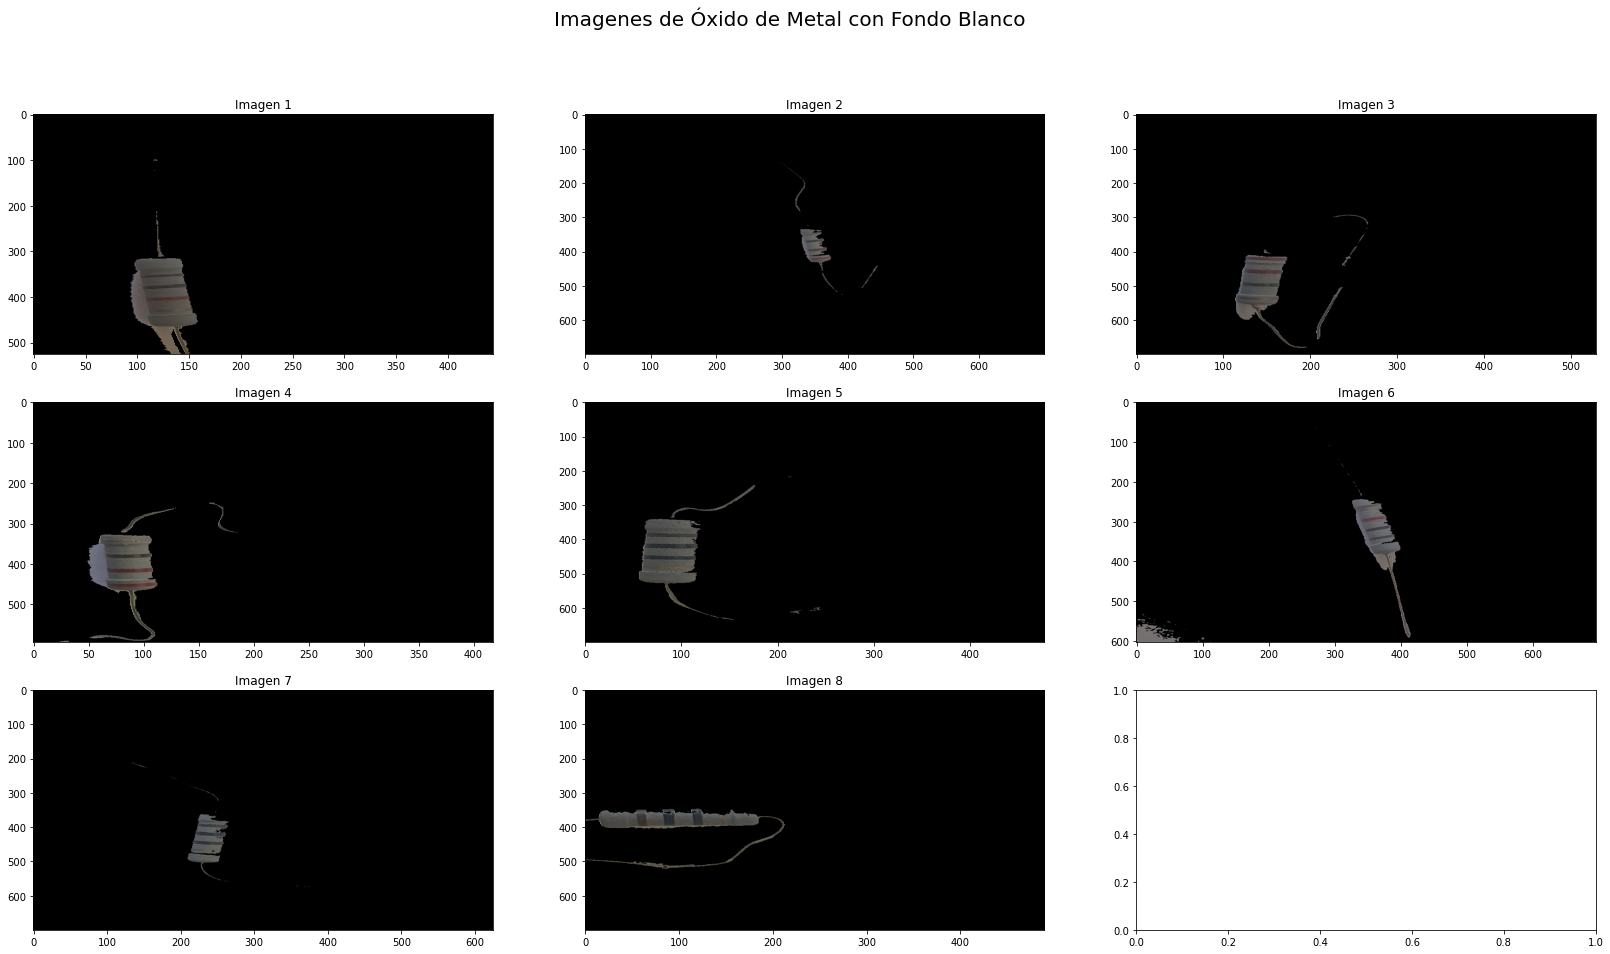

In [18]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(28, 15))
fig.suptitle('Imagenes de Óxido de Metal con Fondo Blanco', fontsize=20)

ax1.set_title('Imagen 1')
ax1.imshow(resultados_MB[0], cmap='Reds', aspect='auto')

ax2.set_title('Imagen 2')
ax2.imshow(resultados_MB[1], cmap='Reds', aspect='auto')

ax3.set_title('Imagen 3')
ax3.imshow(resultados_MB[2], cmap='Reds', aspect='auto')

ax4.set_title('Imagen 4')
ax4.imshow(resultados_MB[3], cmap='Reds', aspect='auto')

ax5.set_title('Imagen 5')
ax5.imshow(resultados_MB[4], cmap='Reds', aspect='auto')

ax6.set_title('Imagen 6')
ax6.imshow(resultados_MB[5], cmap='Reds', aspect='auto')

ax7.set_title('Imagen 7')
ax7.imshow(resultados_MB[6], cmap='Reds', aspect='auto')

ax8.set_title('Imagen 8')
ax8.imshow(resultados_MB[7], cmap='Reds', aspect='auto')


plt.show()

# Fondo de madera

In [29]:
img_MM2 = cv2.imread("res_oxi_M/2.jpg", cv2.IMREAD_COLOR)
img_MM2_ = cv2.cvtColor(img_MM2,cv2.COLOR_BGR2RGB)
img_MM6 = cv2.imread("res_oxi_M/6.jpg", cv2.IMREAD_COLOR)
img_MM6_ = cv2.cvtColor(img_MM6,cv2.COLOR_BGR2RGB)
img_MM7 = cv2.imread("res_oxi_M/7.jpg", cv2.IMREAD_COLOR)
img_MM7_ = cv2.cvtColor(img_MM7,cv2.COLOR_BGR2RGB)
img_MM8 = cv2.imread("res_oxi_M/8.jpg", cv2.IMREAD_COLOR)
img_MM8_ = cv2.cvtColor(img_MM8,cv2.COLOR_BGR2RGB)
img_MM9 = cv2.imread("res_oxi_M/9.jpg", cv2.IMREAD_COLOR)
img_MM9_ = cv2.cvtColor(img_MM9,cv2.COLOR_BGR2RGB)
img_MM12 = cv2.imread("res_oxi_M/12.jpg", cv2.IMREAD_COLOR)
img_MM12_ = cv2.cvtColor(img_MM12,cv2.COLOR_BGR2RGB)
img_MM14 = cv2.imread("res_oxi_M/14.jpg", cv2.IMREAD_COLOR)
img_MM14_ = cv2.cvtColor(img_MM14,cv2.COLOR_BGR2RGB)

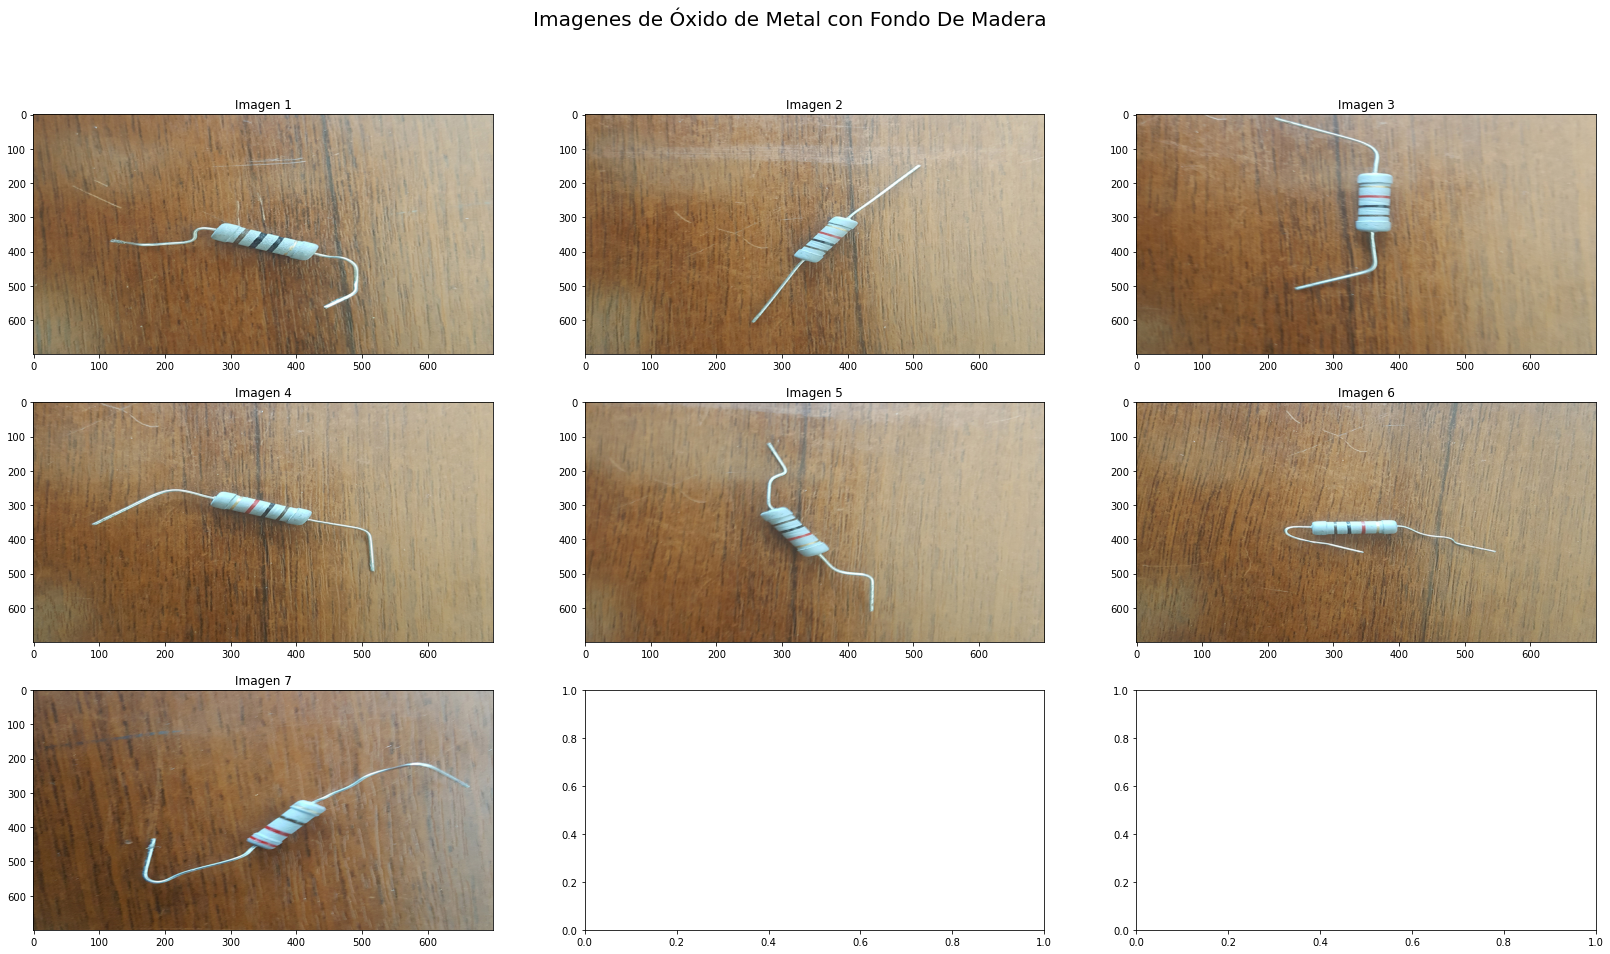

In [30]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(28, 15))
fig.suptitle('Imagenes de Óxido de Metal con Fondo De Madera', fontsize=20)

ax1.set_title('Imagen 1')
ax1.imshow(img_MM2_, cmap='Reds', aspect='auto')

ax2.set_title('Imagen 2')
ax2.imshow(img_MM6_, cmap='Reds', aspect='auto')

ax3.set_title('Imagen 3')
ax3.imshow(img_MM7_, cmap='Reds', aspect='auto')

ax4.set_title('Imagen 4')
ax4.imshow(img_MM8_, cmap='Reds', aspect='auto')

ax5.set_title('Imagen 5')
ax5.imshow(img_MM9_, cmap='Reds', aspect='auto')

ax6.set_title('Imagen 6')
ax6.imshow(img_MM12_, cmap='Reds', aspect='auto')

ax7.set_title('Imagen 7')
ax7.imshow(img_MM14_, cmap='Reds', aspect='auto')


plt.show()

Seleccionamos una:

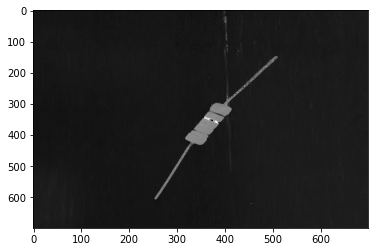

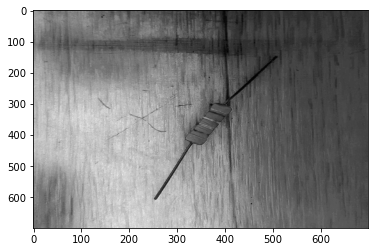

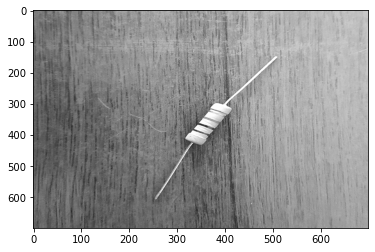

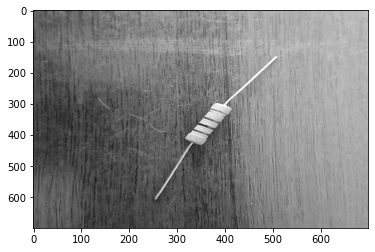

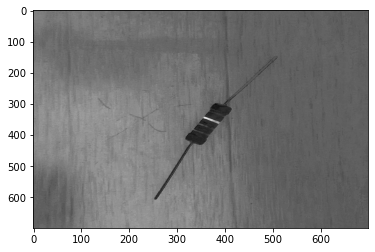

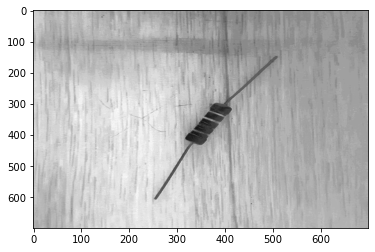

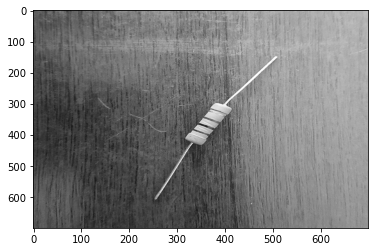

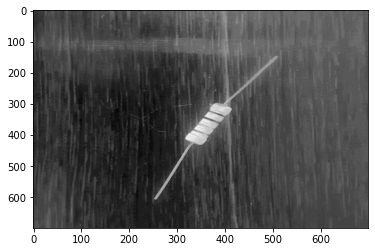

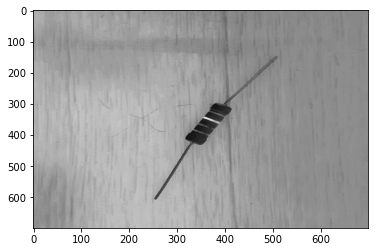

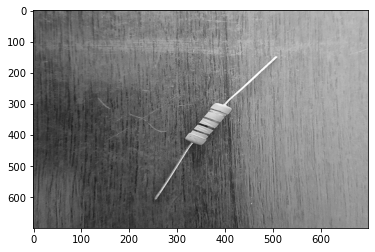

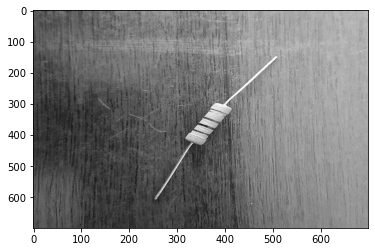

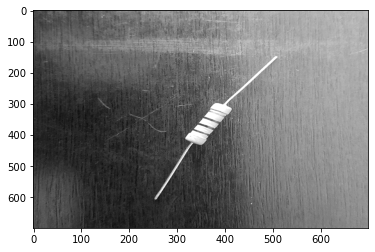

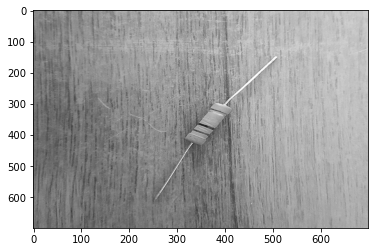

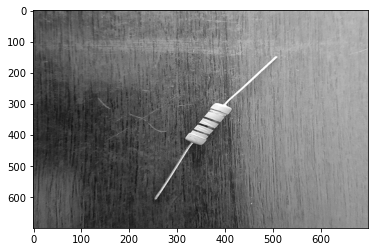

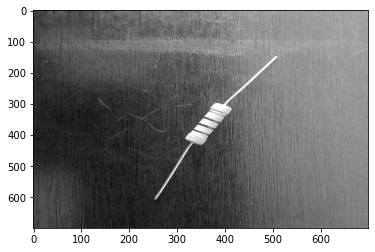

In [7]:
img_bgr = img_MM6
img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
#Convertir a HSV
img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
#Convertir a LAB
img_lab = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2LAB)
#Convertir a YUV
img_yuv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2YUV)
#Convertir a XYZ
img_xyz = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2XYZ)
### Terminar de completar el código ###
lista= [img_hsv,img_lab,img_yuv,img_xyz,img_rgb]

for imagen in lista:
	for i in range(3):
		plt.imshow(imagen[:,:,i],aspect='auto',cmap="gray")
		plt.show()

### Seleccionamos el canal h del hsv

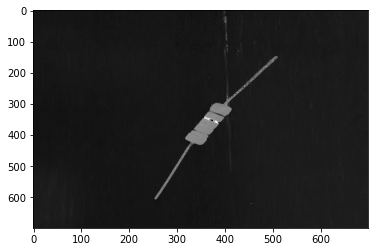

In [8]:
plt.imshow(img_hsv[:,:,0],cmap="gray",aspect='auto')
plt.show()

### Umbralización para la mascara

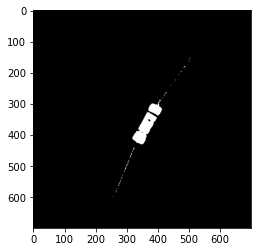

In [9]:
gray= img_hsv[:,:,0]

# Aplicar un suavizado para eliminar el ruido
smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

# Normalizar la imagen en el rango [0, 255]
normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

# Aplicar la umbralización a la imagen normalizada
threshold_value = 120  # Valor de umbral ajustable
_, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)

plt.imshow(thresholded,cmap="gray")

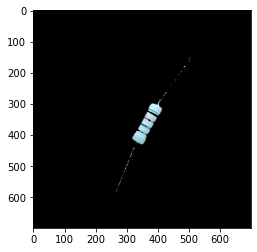

In [13]:
mascara= thresholded

result = cv2.bitwise_and(img_rgb, img_rgb, mask=mascara)
#Muestra el resultado
plt.imshow(cv2.cvtColor(result, cv2.COLOR_BGR2RGB))
plt.imshow(result)
plt.show()

### Función para hacer todos los pasos anteriores:
Recibe como parametro la imagen, hace todo lo anterior y retorna el resultado

In [26]:
def fun_oxiMM_mask(img):
    img_bgr = img
    img_rgb = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2RGB)
    img_hsv = cv2.cvtColor(img_bgr,cv2.COLOR_BGR2HSV)
    
    gray= img_hsv[:,:,0]

    # Aplicar un suavizado para eliminar el ruido
    smoothed = cv2.GaussianBlur(gray, (5, 5), 0)

    # Normalizar la imagen en el rango [0, 255]
    normalized = cv2.normalize(smoothed, None, 0, 255, cv2.NORM_MINMAX, dtype=cv2.CV_8U)

    # Aplicar la umbralización a la imagen normalizada
    threshold_value = 120  # Valor de umbral ajustable
    _, thresholded = cv2.threshold(normalized, threshold_value, 255, cv2.THRESH_BINARY)
    
    mascara= thresholded

    result = cv2.bitwise_and(img_rgb, img_rgb, mask=mascara)
    
    return result


In [27]:
resultados_MM = []
lista_MM = [img_MM12,img_MM14,img_MM2,img_MM6,img_MM7,img_MM8,img_MM9]

for e in lista_MM:
    resultados_MM.append(fun_oxiMM_mask(e))

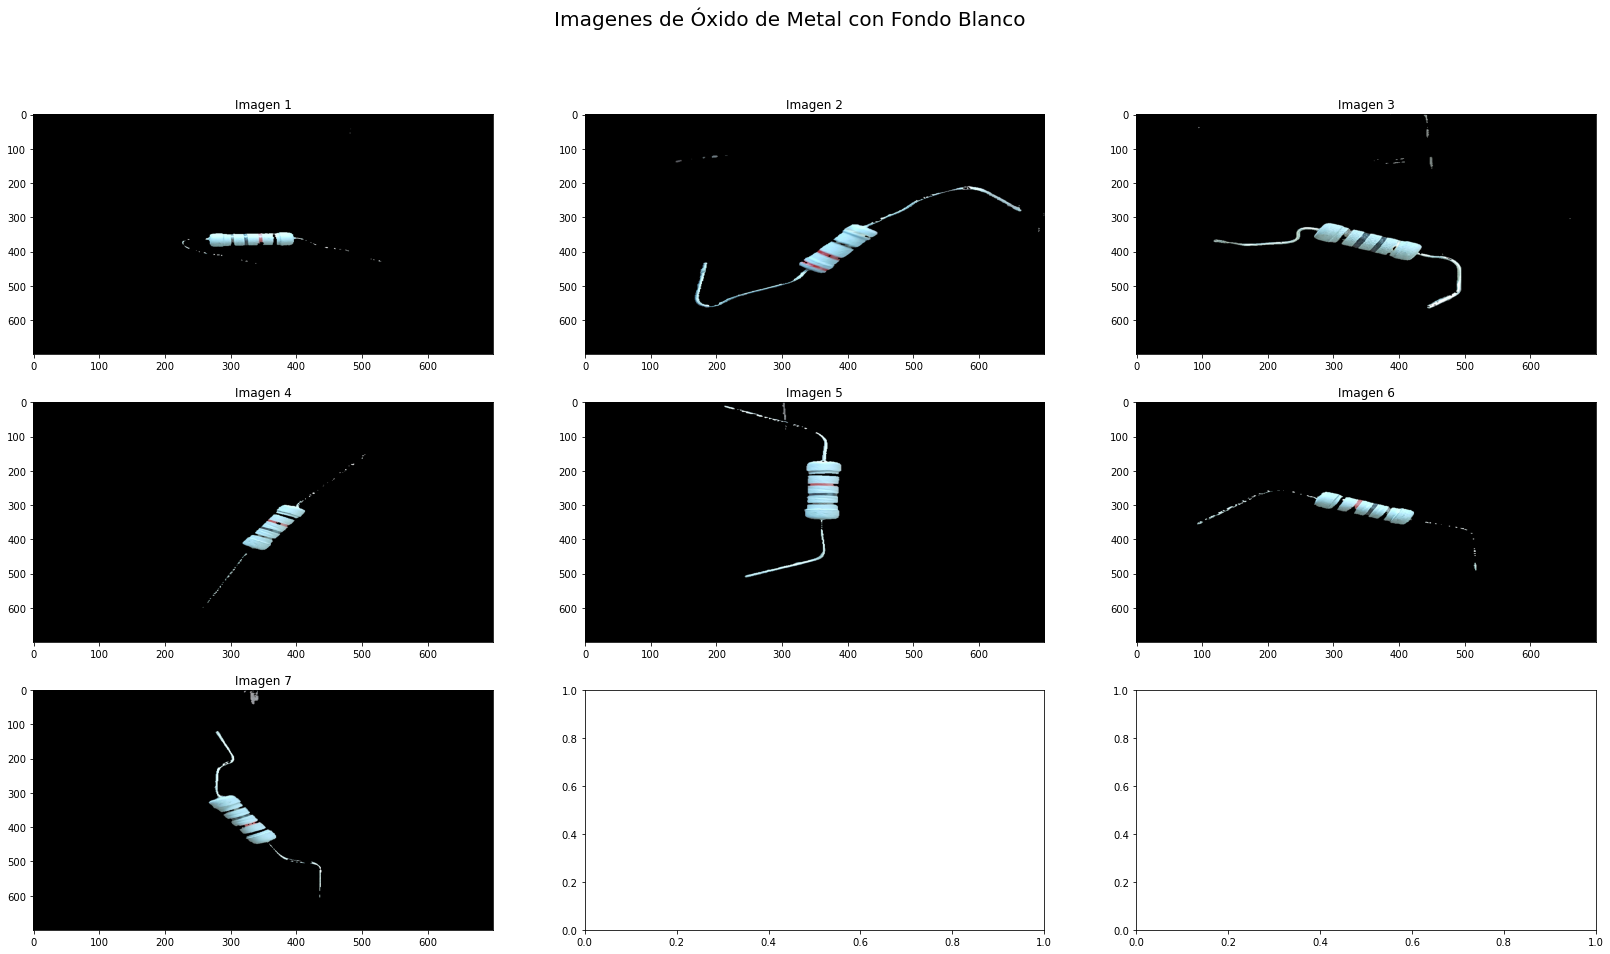

In [28]:
fig, ((ax1, ax2, ax3), (ax4, ax5, ax6),(ax7,ax8,ax9)) = plt.subplots(3,3, figsize=(28, 15))
fig.suptitle('Imagenes de Óxido de Metal con Fondo Blanco', fontsize=20)

ax1.set_title('Imagen 1')
ax1.imshow(resultados_MM[0], cmap='Reds', aspect='auto')

ax2.set_title('Imagen 2')
ax2.imshow(resultados_MM[1], cmap='Reds', aspect='auto')

ax3.set_title('Imagen 3')
ax3.imshow(resultados_MM[2], cmap='Reds', aspect='auto')

ax4.set_title('Imagen 4')
ax4.imshow(resultados_MM[3], cmap='Reds', aspect='auto')

ax5.set_title('Imagen 5')
ax5.imshow(resultados_MM[4], cmap='Reds', aspect='auto')

ax6.set_title('Imagen 6')
ax6.imshow(resultados_MM[5], cmap='Reds', aspect='auto')

ax7.set_title('Imagen 7')
ax7.imshow(resultados_MM[6], cmap='Reds', aspect='auto')


plt.show()